# Neta Shiff

# Assignment 1: Basic plotting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import Image, display

datadir = '/content/drive/MyDrive/DataVis/assigment1/data/'
imagesdir = '/content/drive/MyDrive/DataVis/assigment1/images/'

# datadir = 'data/'
# imagesdir = 'images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))


Mounted at /content/drive


## A little plotly

Plotly is a package for online plotting in Python. Since it's implemented in JavaScript, the interactive plots can present in the web browser. We'll mostly use [*Plotly Express*,](https://plotly.com/python/plotly-express/) a high-level interface built on top of plotly which facilitates easy generation of figures.

In [ ]:
# you may need to run this to install plotly
!pip install plotly

In [ ]:
renderer = 'notebook'

def show(fig):
  fig.show(renderer=None)

import plotly.express as px

In [ ]:
import plotly
plotly.__version__

'5.15.0'

In [ ]:
ys = [2, 4, 5, 1, 7, 9]
fig = px.line(y=ys)
show(fig)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ys = [2, 4, 5, 1, 7, 9]

fig = make_subplots()
fig.add_trace(go.Scatter(y=ys, mode='lines'))

fig.show(renderer="colab")



In [ ]:
import plotly.express as px
import plotly.io as pio

ys = [2, 4, 5, 1, 7, 9]

# Create and display line plot
fig_line = px.line(y=ys)
pio.show(fig_line)

# Create and display bar plot
fig_bar = px.bar(y=ys)
pio.show(fig_bar)

# Create scatter plot
fig_scatter = px.scatter(y=ys)

# Update marker size
fig_scatter.update_traces(marker=dict(size=12))
pio.show(fig_scatter)

## 4
n = len(ys)
# Create line plot
fig = px.line(x=range(0, 2*n, 2), y=ys)
# Update line properties
fig.update_traces(line_color='green', line_dash='dash', line_width=4)
# Show plot
pio.show(fig)


In [ ]:
fig = px.bar(y=ys)
show(fig)

In [ ]:
fig = px.scatter(y=ys)
fig.update_traces(marker_size=12)
show(fig)

In [ ]:
n = len(ys)
fig = px.line(x=range(0, 2*n, 2), y=ys)
fig.update_traces(line_color='green', line_dash='dash', line_width=4)
show(fig)

Plotly figures are dictionaries whose values can be modified. It's helpful to understand how Plotly represents figures. See https://plotly.com/python/creating-and-updating-figures/ for details.

In [ ]:
print(fig)

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': 'green', 'dash': 'dash', 'width': 4},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 0,  2,  4,  6,  8, 10]),
              'xaxis': 'x',
              'y': array([2, 4, 5, 1, 7, 9]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})


## A little numpy

Numpy is the standard package for numerical computation in Python. We'll be learning and using some basic numpy in this course.

To plot a smooth curve over a function, we want to evaluate the function at many evenly-spaced *x* values in a range of the domain. A sequence of values of the same type is called a numpy array or simply an array (for example an array of integers or floats). We import numpy and call it *np* so that any function in the numpy package may be called as np.function.

In [ ]:
[4, 'hello', 5.7, (1,2)]

[4, 'hello', 5.7, (1, 2)]

In [ ]:
import numpy as np

In [ ]:
# generate 5 values spaced evenly from 0.0 to 2.0
np.linspace(0, 2, 5)

array([0. , 0.5, 1. , 1.5, 2. ])

In [ ]:
# 100 values from -4 to 4
xs = np.linspace(-4, 4, 100)
print(xs[-10:])

[3.27272727 3.35353535 3.43434343 3.51515152 3.5959596  3.67676768
 3.75757576 3.83838384 3.91919192 4.        ]


Plotting the value of polynomial $y=ax^2+bx+c$ for some coefficients $a$, $b$, and $c$.

In [ ]:
xs = np.linspace(-4, 4, 100)

a = -1
b = 1
c = -6

def f(x, a, b, c):
    return a * x ** 2 + b * x + c

ys = []
for x in xs:
    ys.append(f(x, a, b, c))

# Show plot
pio.show(px.line(x=xs, y=ys))


In [ ]:
a = -1
b = 1
c = -6
def f(x, a, b, c):
    return a * x ** 2 + b * x + c
ys = []
for x in xs:
    ys.append(f(x, a, b, c))
show(px.line(x=xs, y=ys))

But we can do it much more cleanly than that because we can manipulate numpy arrays as single objects. Some examples.

In [ ]:
a = np.array(range(9))
print(a)
print(a + 2)
print(a * 2)
def pow(x):
    return 2 ** x
print(pow(a))

[0 1 2 3 4 5 6 7 8]
[ 2  3  4  5  6  7  8  9 10]
[ 0  2  4  6  8 10 12 14 16]
[  1   2   4   8  16  32  64 128 256]


In [ ]:
def make_poly(a, b, c):
    def f(x):
        return a * x ** 2 + b * x + c
    return f

f = make_poly(1, 1, -6)

pio.show(px.line(x=xs, y=f(xs)))


## Exercise 1
Plot $y=(x+2)(x-1)(x-4)$ for $x$ going from $-3$ to $+5$. Label the axes and set the title as in the figure below. Here's what it should look like.


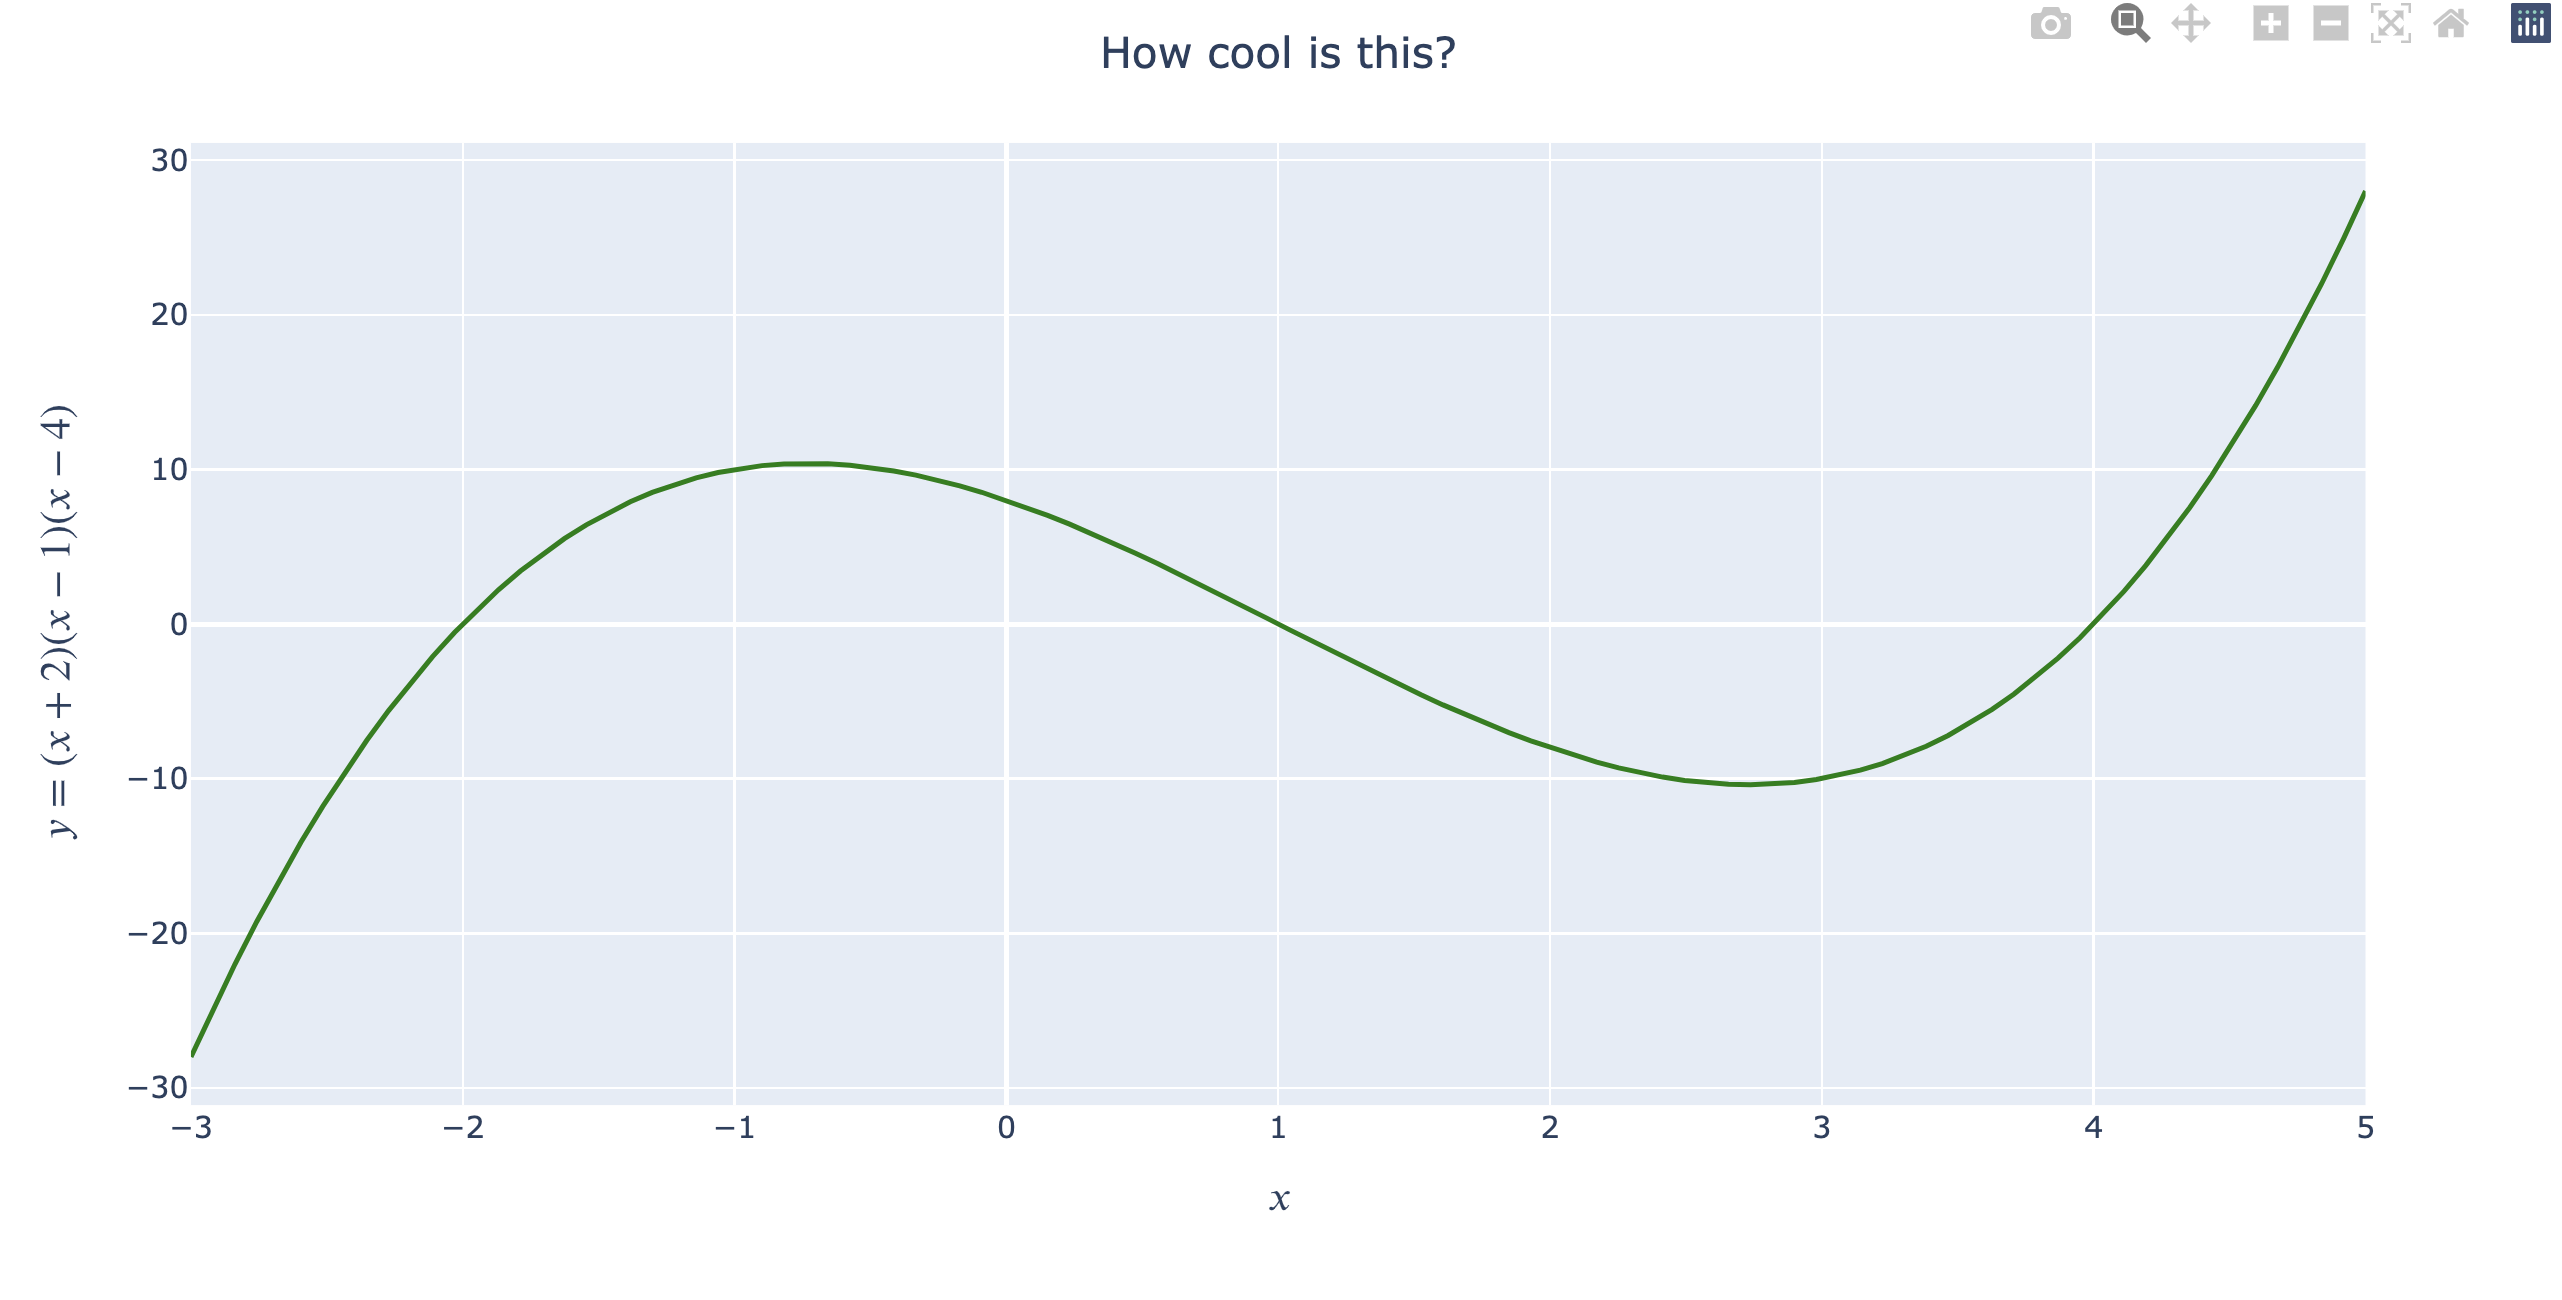

In [21]:
# Define the function
def f(x):
    return (x + 2) * (x - 1) * (x - 4)

# Generate x values
xs = np.linspace(-3, 5, 100)

# Calculate y values
ys = f(xs)

# Show plot
fig = px.line(x=xs, y=ys, labels={'x':'x', 'y':'y = (x + 2)(x - 1)(x - 4)'}, title='Plot of y = (x + 2)(x - 1)(x - 4)')
fig.update_traces(line_color='green')
show(fig)

display_images(['ass1_ex1.png'])

## Exercise 2

Write a more general function for plotting a polynomial and its roots, given a list of its roots.

```plot_polynomial_and_roots(roots, xrange)```

plots the polynomial and its roots from xrange[0] to xrange[1]. Note the polynomial appears as the plot's title. Here are two examples:

    plot_polynomial_and_roots([-2, 1, 4], xrange=(-3, 5))
    plot_polynomial_and_roots([-5, -2, 4, 12], xrange=(-7, 14), color='orange')

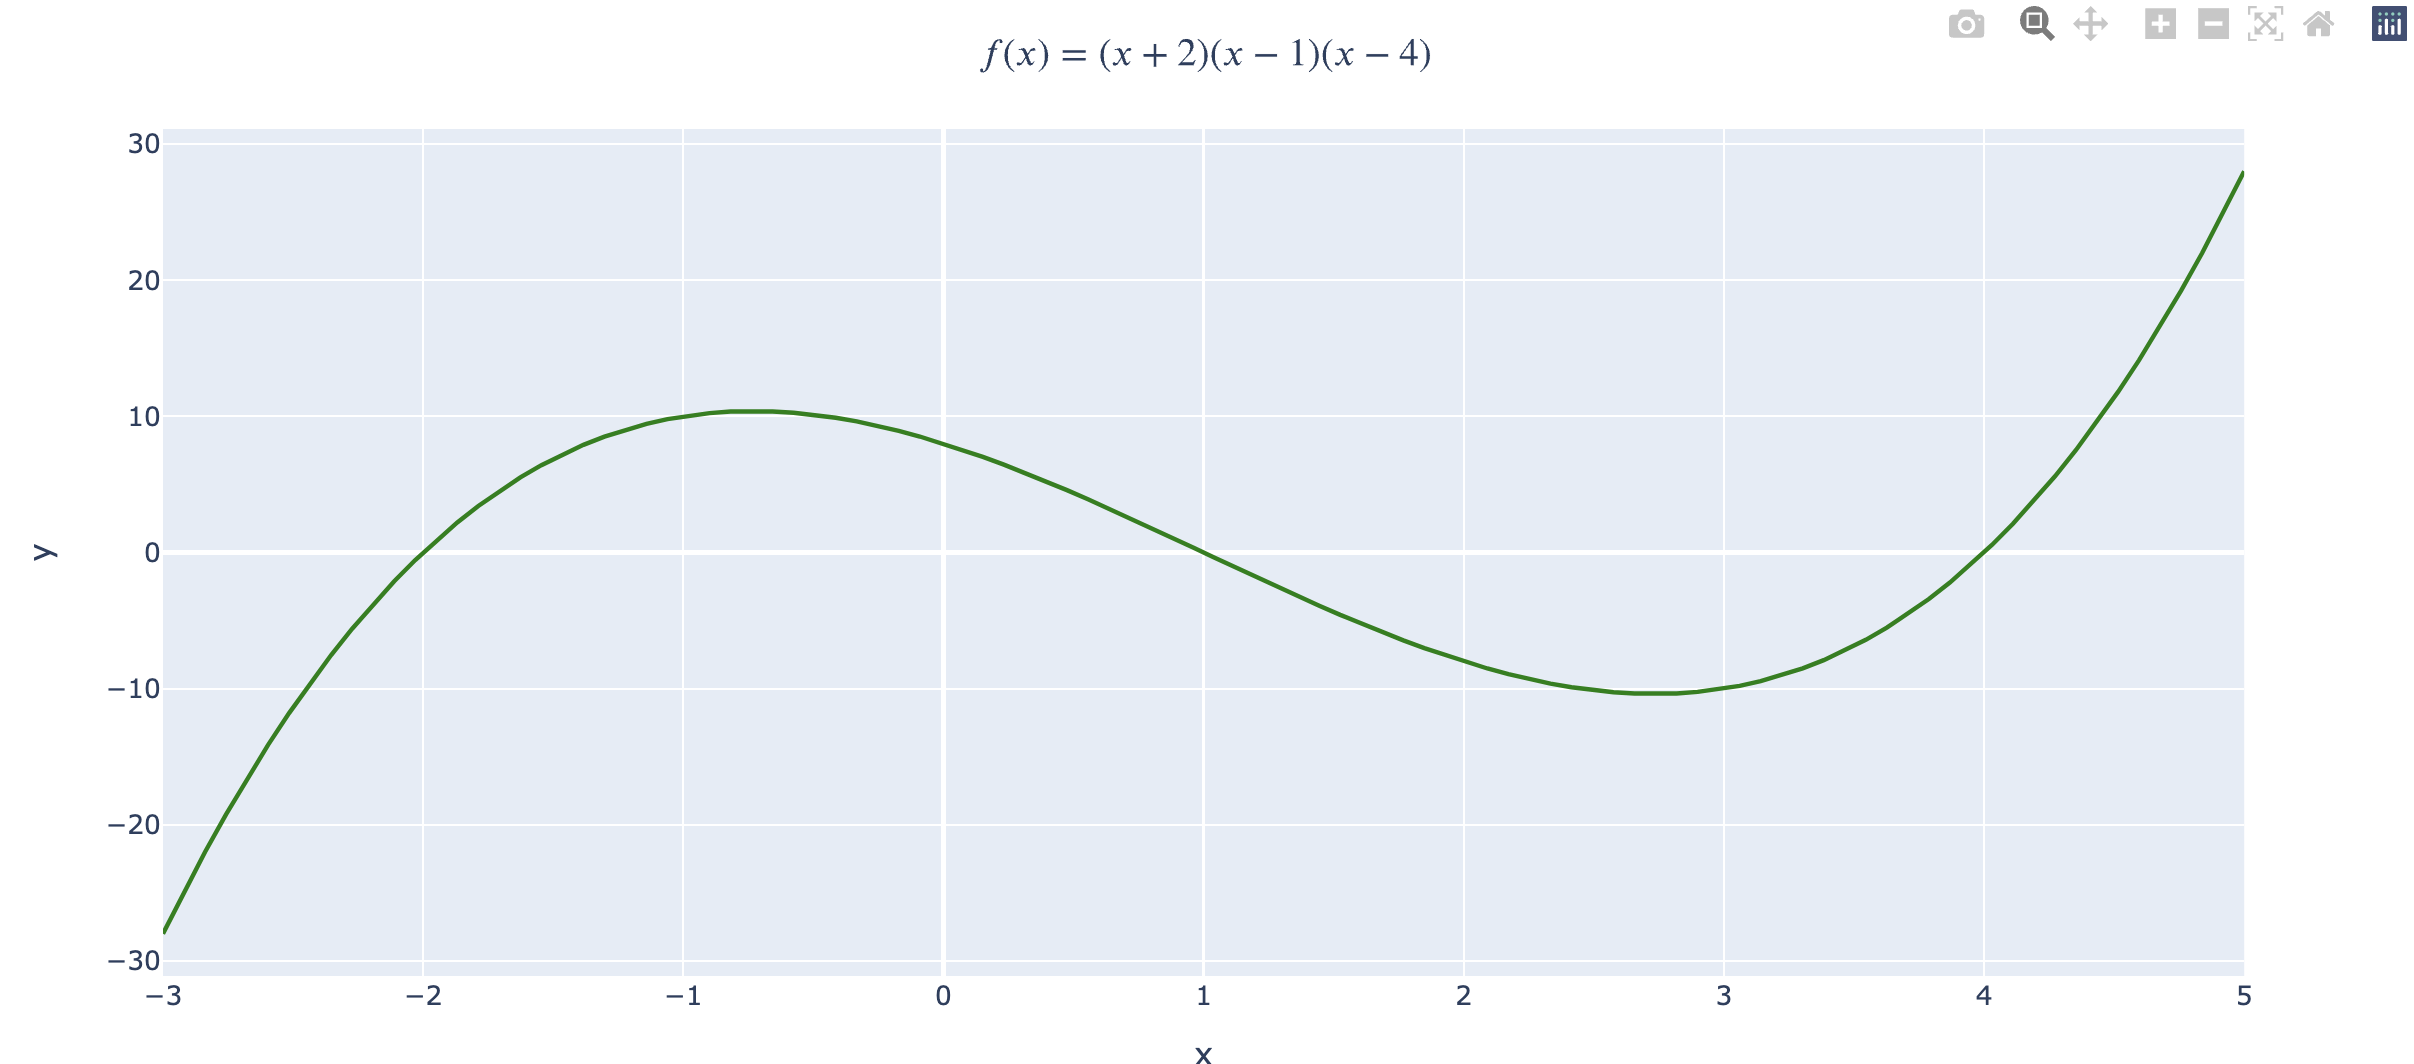

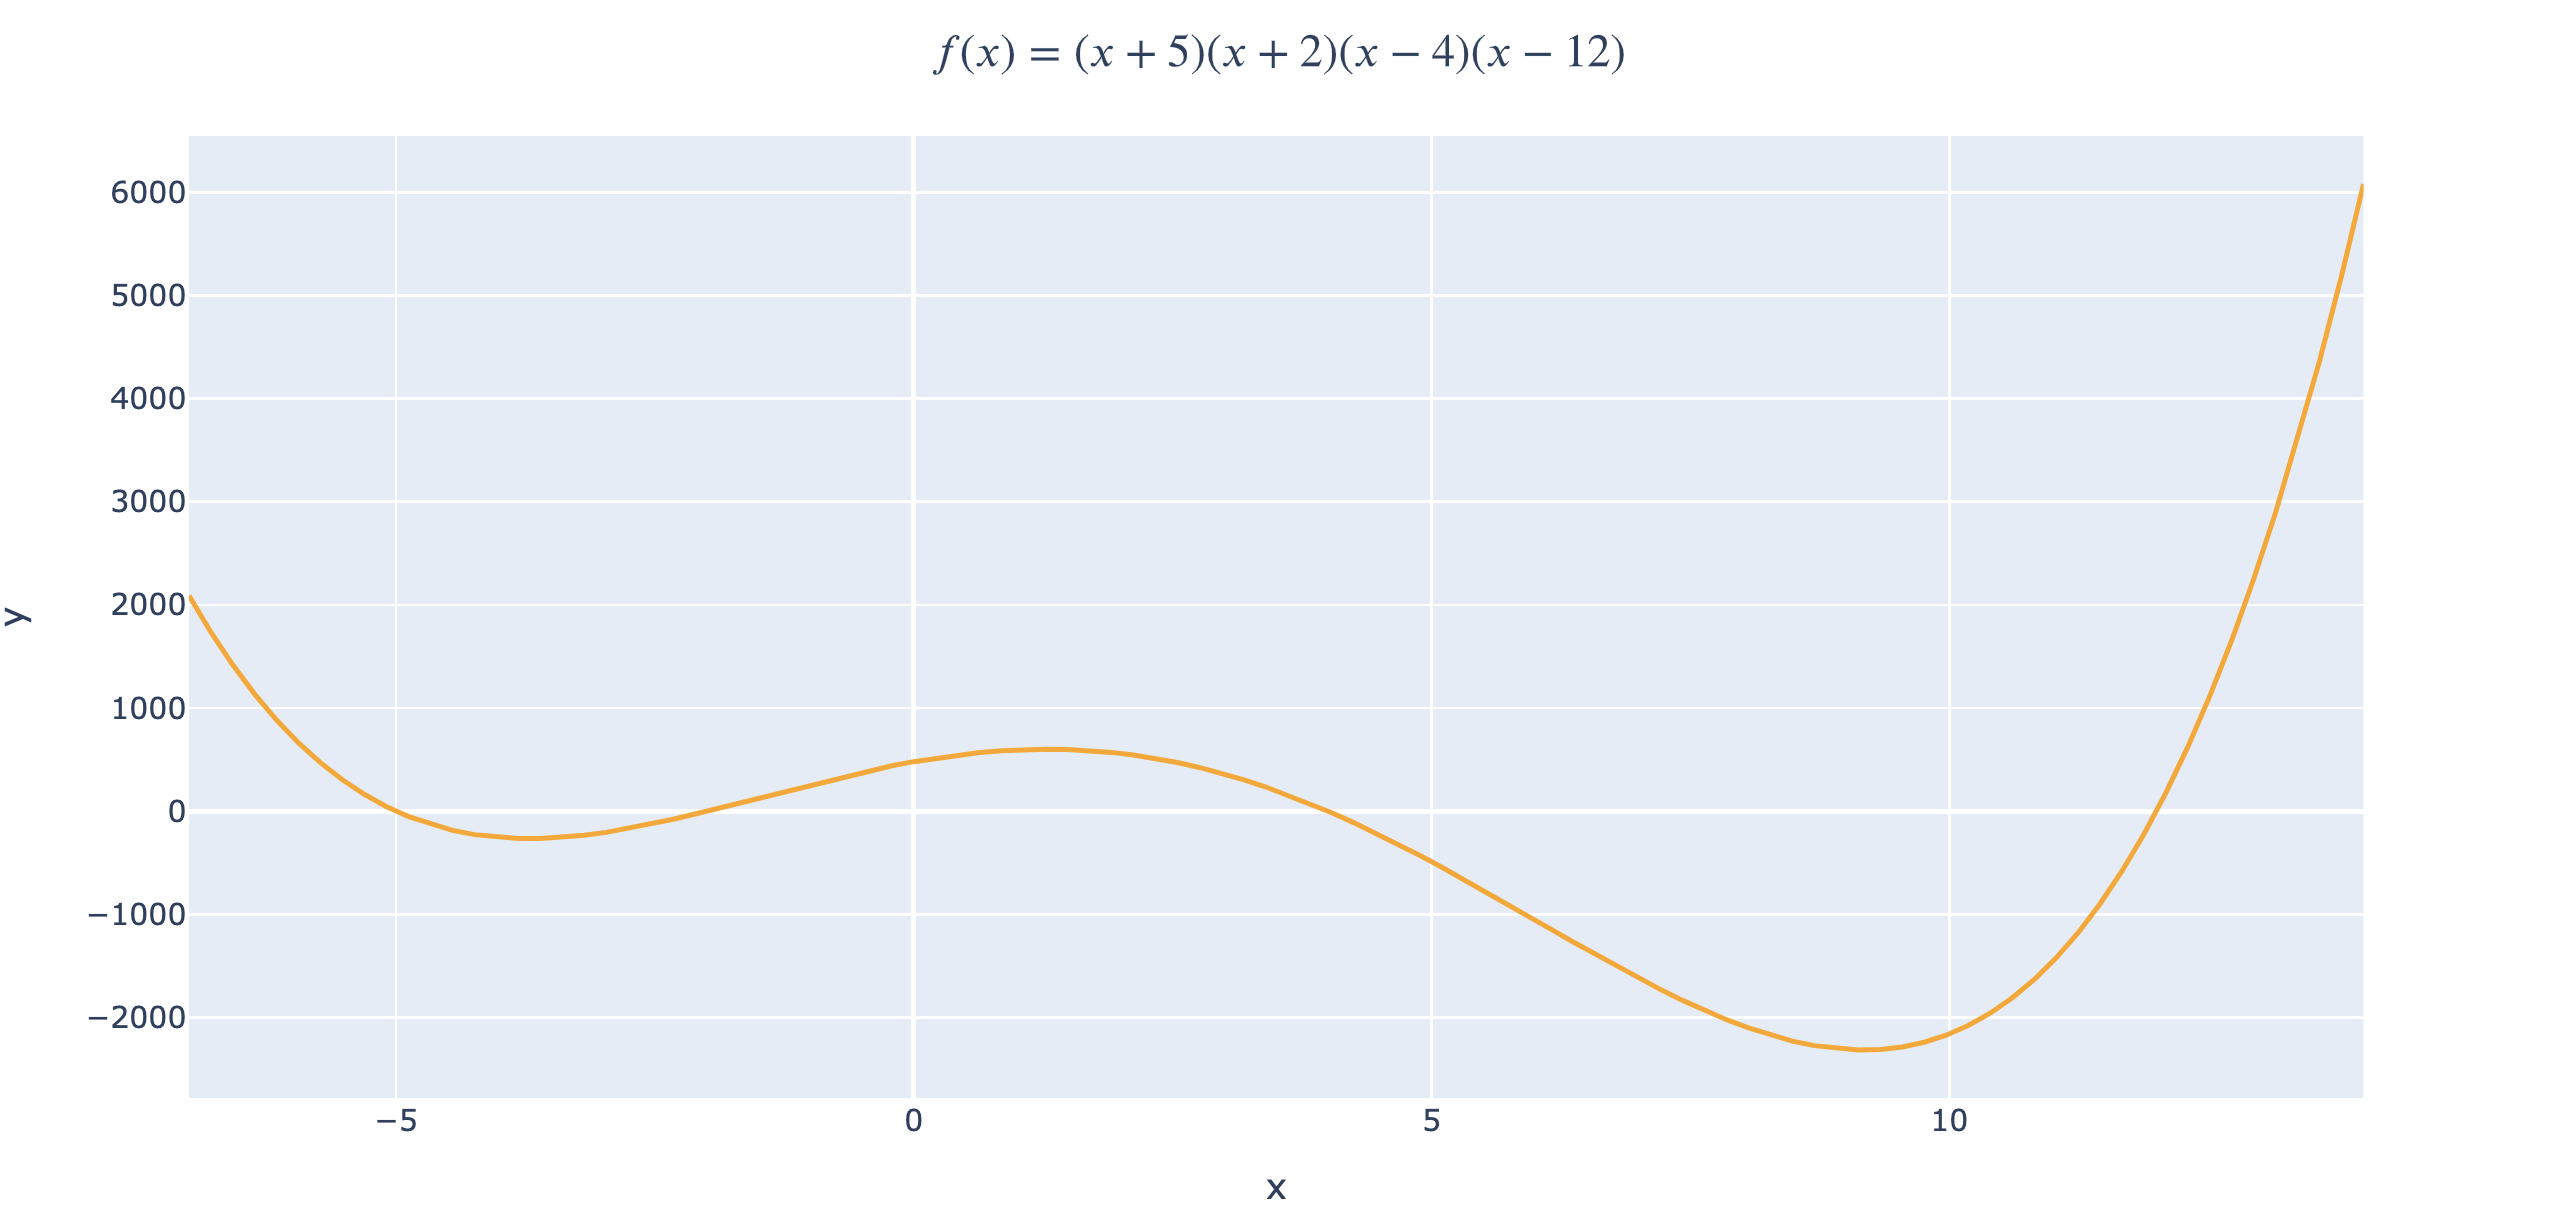

In [ ]:
def plot_polynomial_and_roots(roots, xrange, color='green'):
    # Define the polynomial function
    def polynomial(x):
        result = 1
        for root in roots:
            result *= (x - root)
        return result

    # Generate x values
    xs = np.linspace(xrange[0], xrange[1], 100)
    # Calculate y values for the polynomial
    ys_polynomial = polynomial(xs)
    # Create a figure with the polynomial plot
    fig = px.line(x=xs, y=ys_polynomial, labels={'x': 'x', 'y': 'y'}, title=f'Polynomial and Roots: {roots}')
    # Update line color
    fig.update_traces(line=dict(color=color))
    # Add markers for roots
    #for root in roots:
    #    fig.add_scatter(x=[root], y=[0], mode='markers', marker=dict(size=10, color='red', symbol='x'), name='Roots')

    # Show plot
    pio.show(fig)



plot_polynomial_and_roots([-2, 1, 4], xrange=(-3, 5))
plot_polynomial_and_roots([-5, -2, 4, 12], xrange=(-7, 14), color='orange')





display_images(['ass1_ex2A.png', 'ass1_ex2B.png'])

## Exercise 3

Enhance your `fig_poly_and_roots(plot_polynomial_and_roots(roots, xrange, color)` function so that it also plots the polynomial's roots as blue circular markers. Note that the positions of these markers can be obtained from the first argument `roots`. You may find it helpful to work with graph objects. Try this:

    import plotly.graph_objects as go

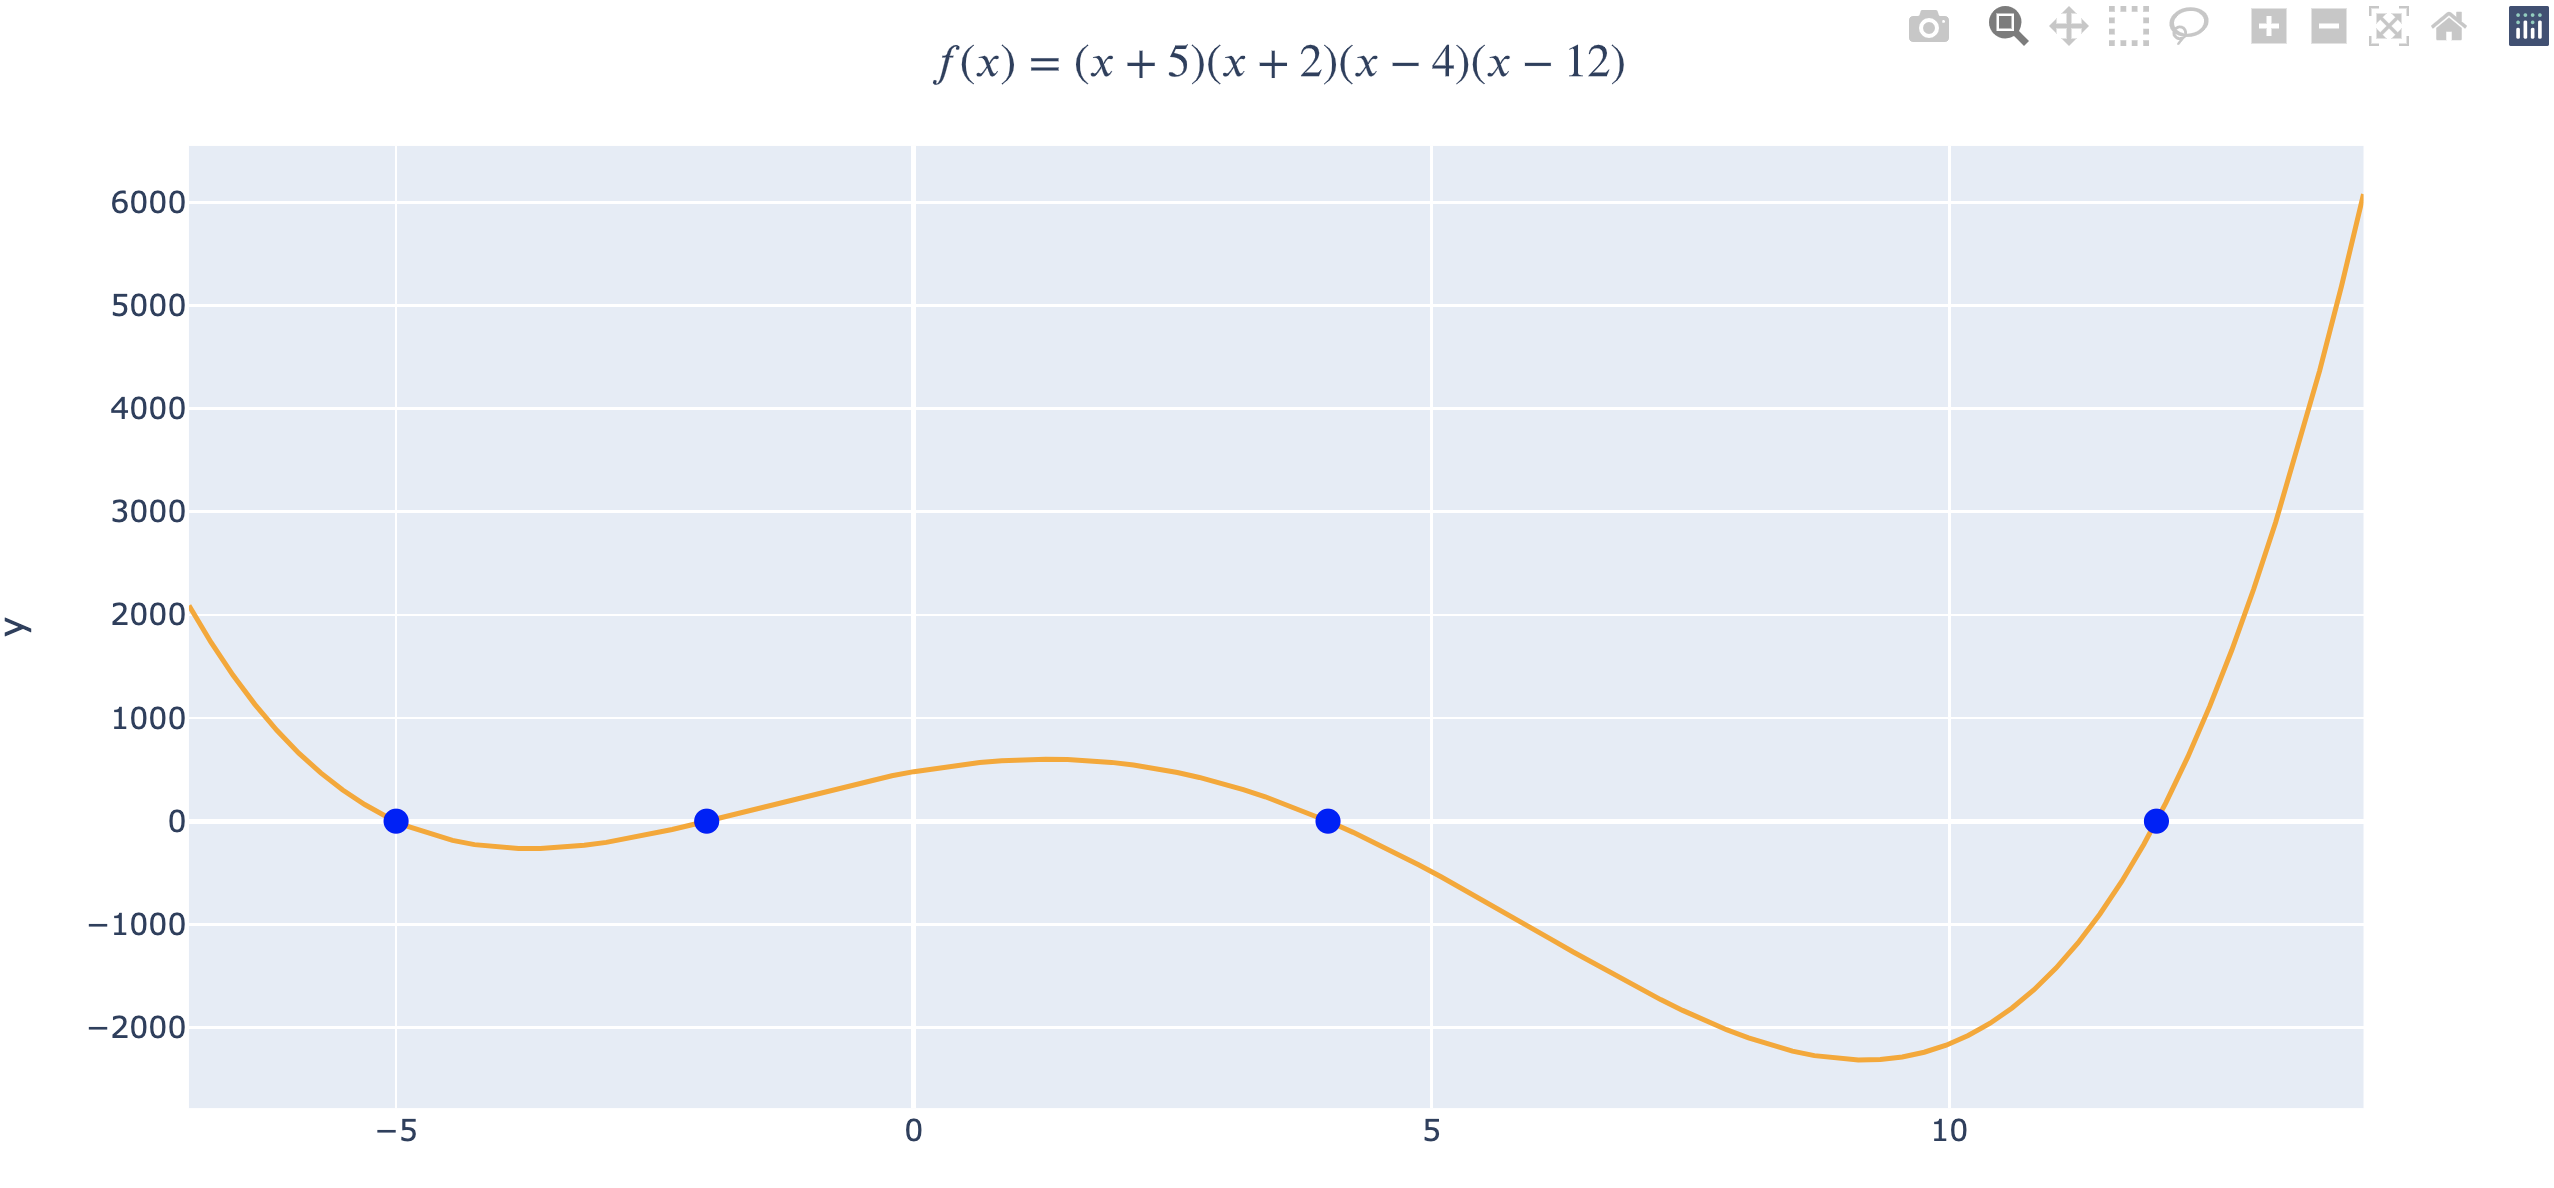

In [23]:
import plotly.graph_objects as go

def plot_polynomial_and_roots(roots, xrange, color='red'):
    # Generate x values within the specified xrange
    xs = np.linspace(xrange[0], xrange[1], 100)

    # Define the polynomial function
    def polynomial(x):
        result = 1
        for root in roots:
            result *= (x - root)
        return result

    # Calculate y values for the polynomial
    ys_polynomial = [polynomial(x) for x in xs]

    # Create a trace for the polynomial
    polynomial_trace = go.Scatter(x=xs, y=ys_polynomial, mode='lines', name='Polynomial', line=dict(color=color))

    # Create a trace for the roots
    roots_trace = go.Scatter(x=roots, y=[0] * len(roots), mode='markers', name='Roots', marker=dict(color='blue', symbol='circle', size=10))

    # Create the figure
    fig = go.Figure([polynomial_trace, roots_trace])

    # Set axis labels and title
    fig.update_layout(xaxis_title='x', yaxis_title='y', title=f'Polynomial and Roots: {roots}')

    # Show the plot
    fig.show()

plot_polynomial_and_roots([-2, 1, 4], xrange=(-3, 5))
plot_polynomial_and_roots([-5, -2, 4, 12], xrange=(-7, 14), color='orange')


display_images(['ass1_ex3.png'])

We move on to another topic. You can load datafiles using numpy's ```loadtxt``` function. Here we are provided with the data files containing the mean montly temperature of Holland, New York City, and Beijing in Celcius. The Dutch data is stored in `holland_temperature.dat`, and the other filenames are similar.

In [24]:
import calendar
holland = np.loadtxt(datadir + 'holland_temperature.dat')
print(holland)
for month, temp in zip(calendar.month_name[1:], holland):
    print(month, temp)

[ 3.1  3.3  6.2  9.2 13.1 15.6 17.9 17.5 14.5 10.7  6.7  3.7]
January 3.1
February 3.3
March 6.2
April 9.2
May 13.1
June 15.6
July 17.9
August 17.5
September 14.5
October 10.7
November 6.7
December 3.7


Here we plot temperatures for Holland and NYC on the same figure. Note that `curves` is a dictionary mapping strings to data, and that the `y` argument to `px.line` uses these strings to identify the data to be plotted.

In [25]:
nyc = np.loadtxt(datadir + 'newyork_temperature.dat')
curves = {'holland': holland, 'nyc': nyc}
x = np.arange(0, 12)
fig = px.line(curves, x=x, y=['holland', 'nyc'])
pio.show(px.line(curves, x=x, y=['holland', 'nyc']))

## Exercise 4
Write code that generates the following figure.

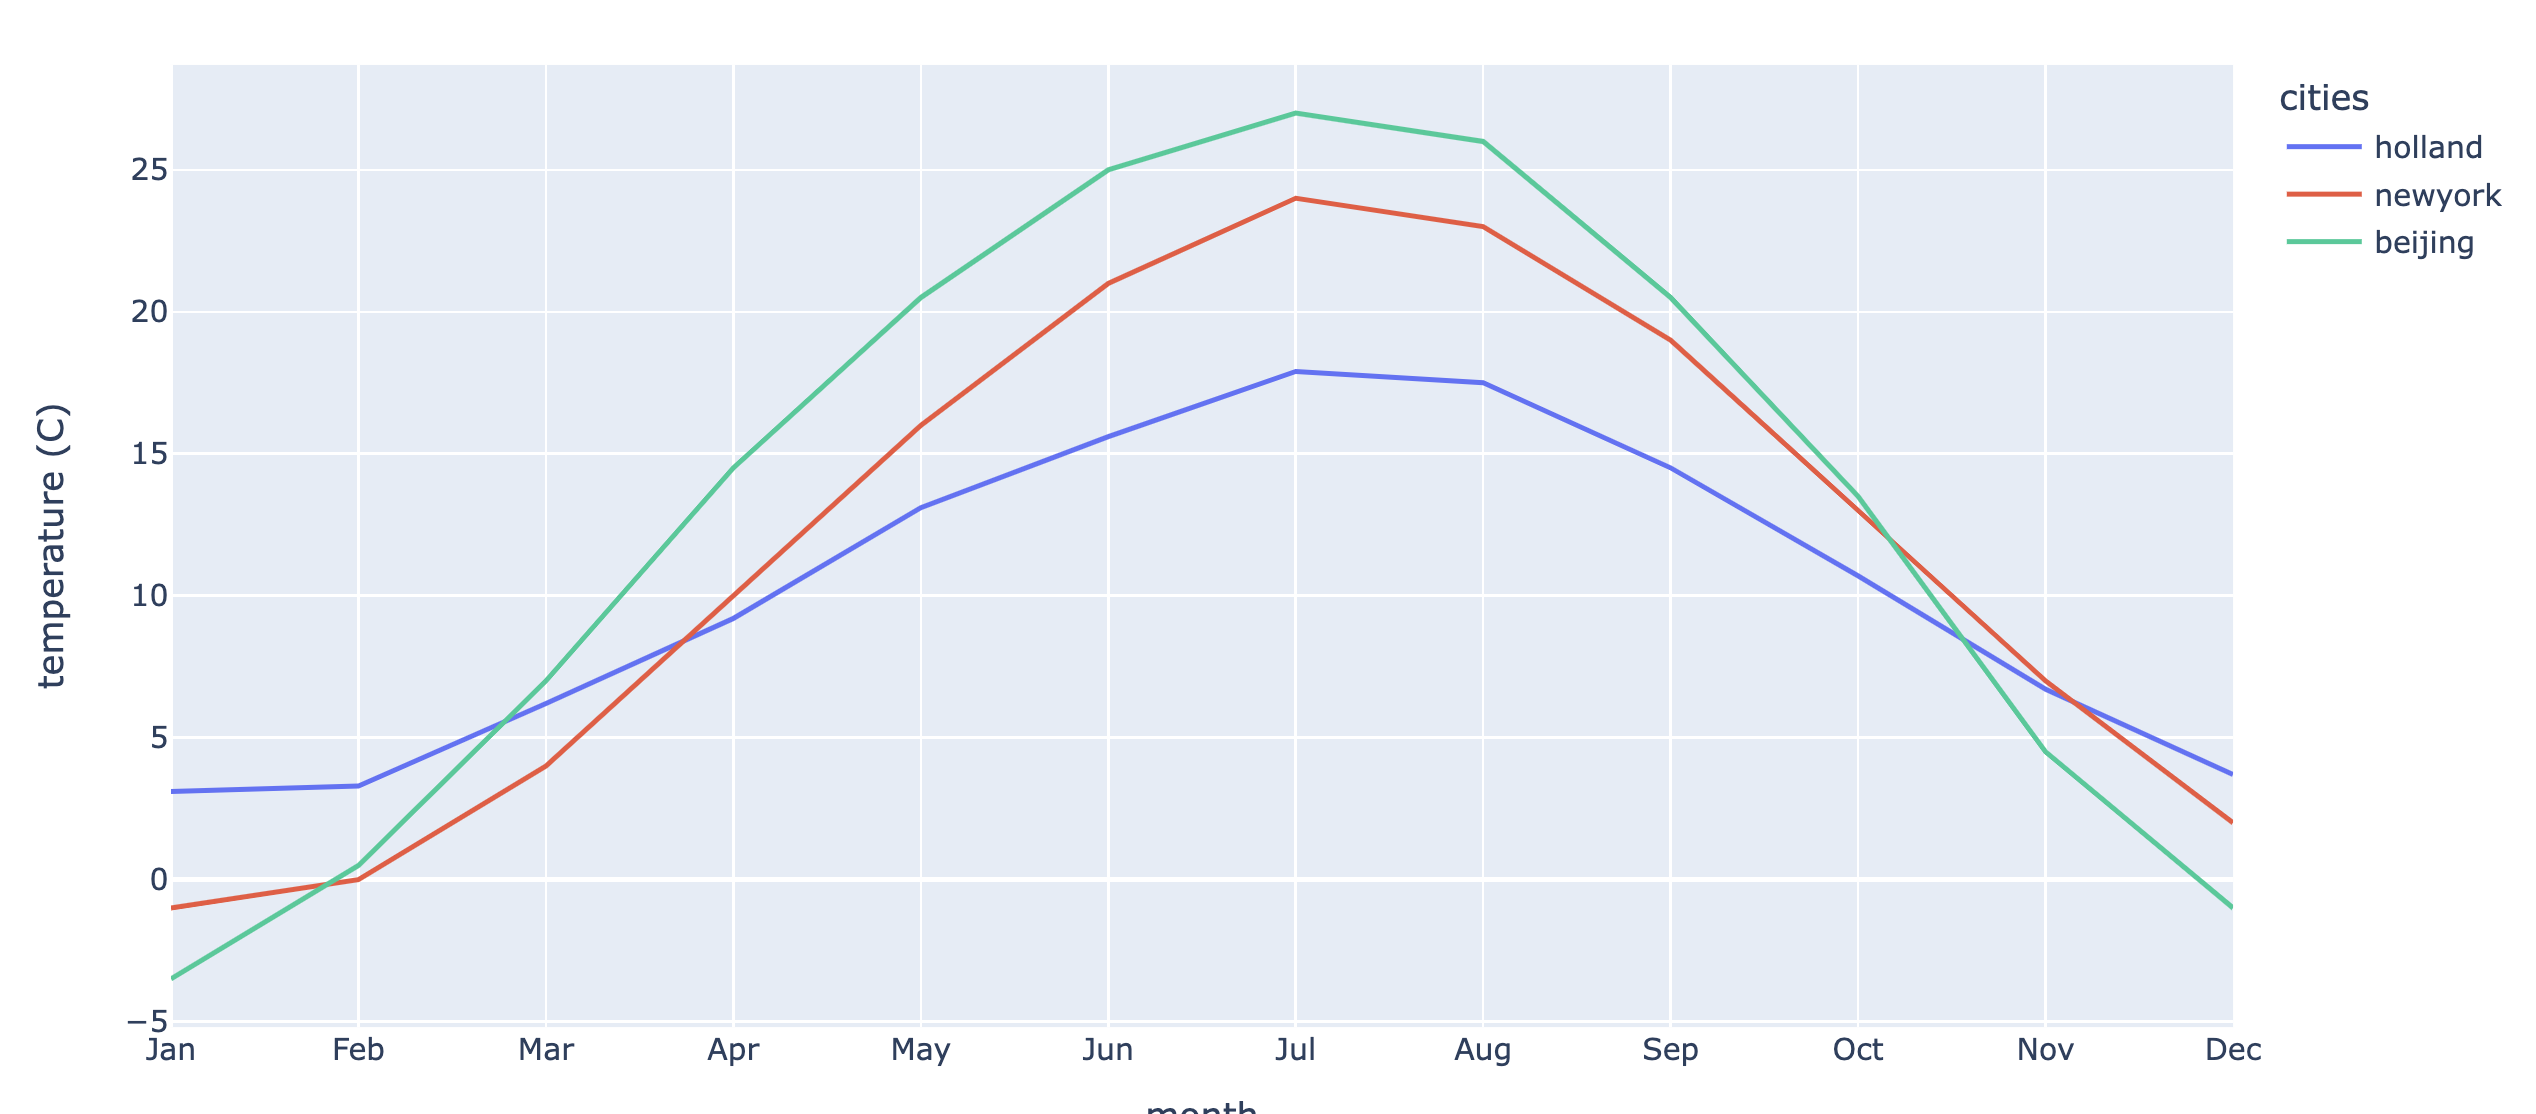

In [51]:
beijing = np.loadtxt(datadir + 'beijing_temperature.dat')
curves = {'holland': holland, 'nyc': nyc, 'beijing': beijing}
# x = np.arange(0, 12)
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

fig = px.line(curves, x=months, y=['holland','nyc','beijing'],
              labels={'x': 'Month', 'value': 'Temperature (C)'},
              title='Monthly Temperature for Different Cities')

show(fig)

display_images(['ass1_ex4.png'])

## Exercise 5

Write code to generate the following figure. [Hint: Use the dictionary mapping city names to values you used in the previous exercise, but use `px.bar` to produce the figure.]

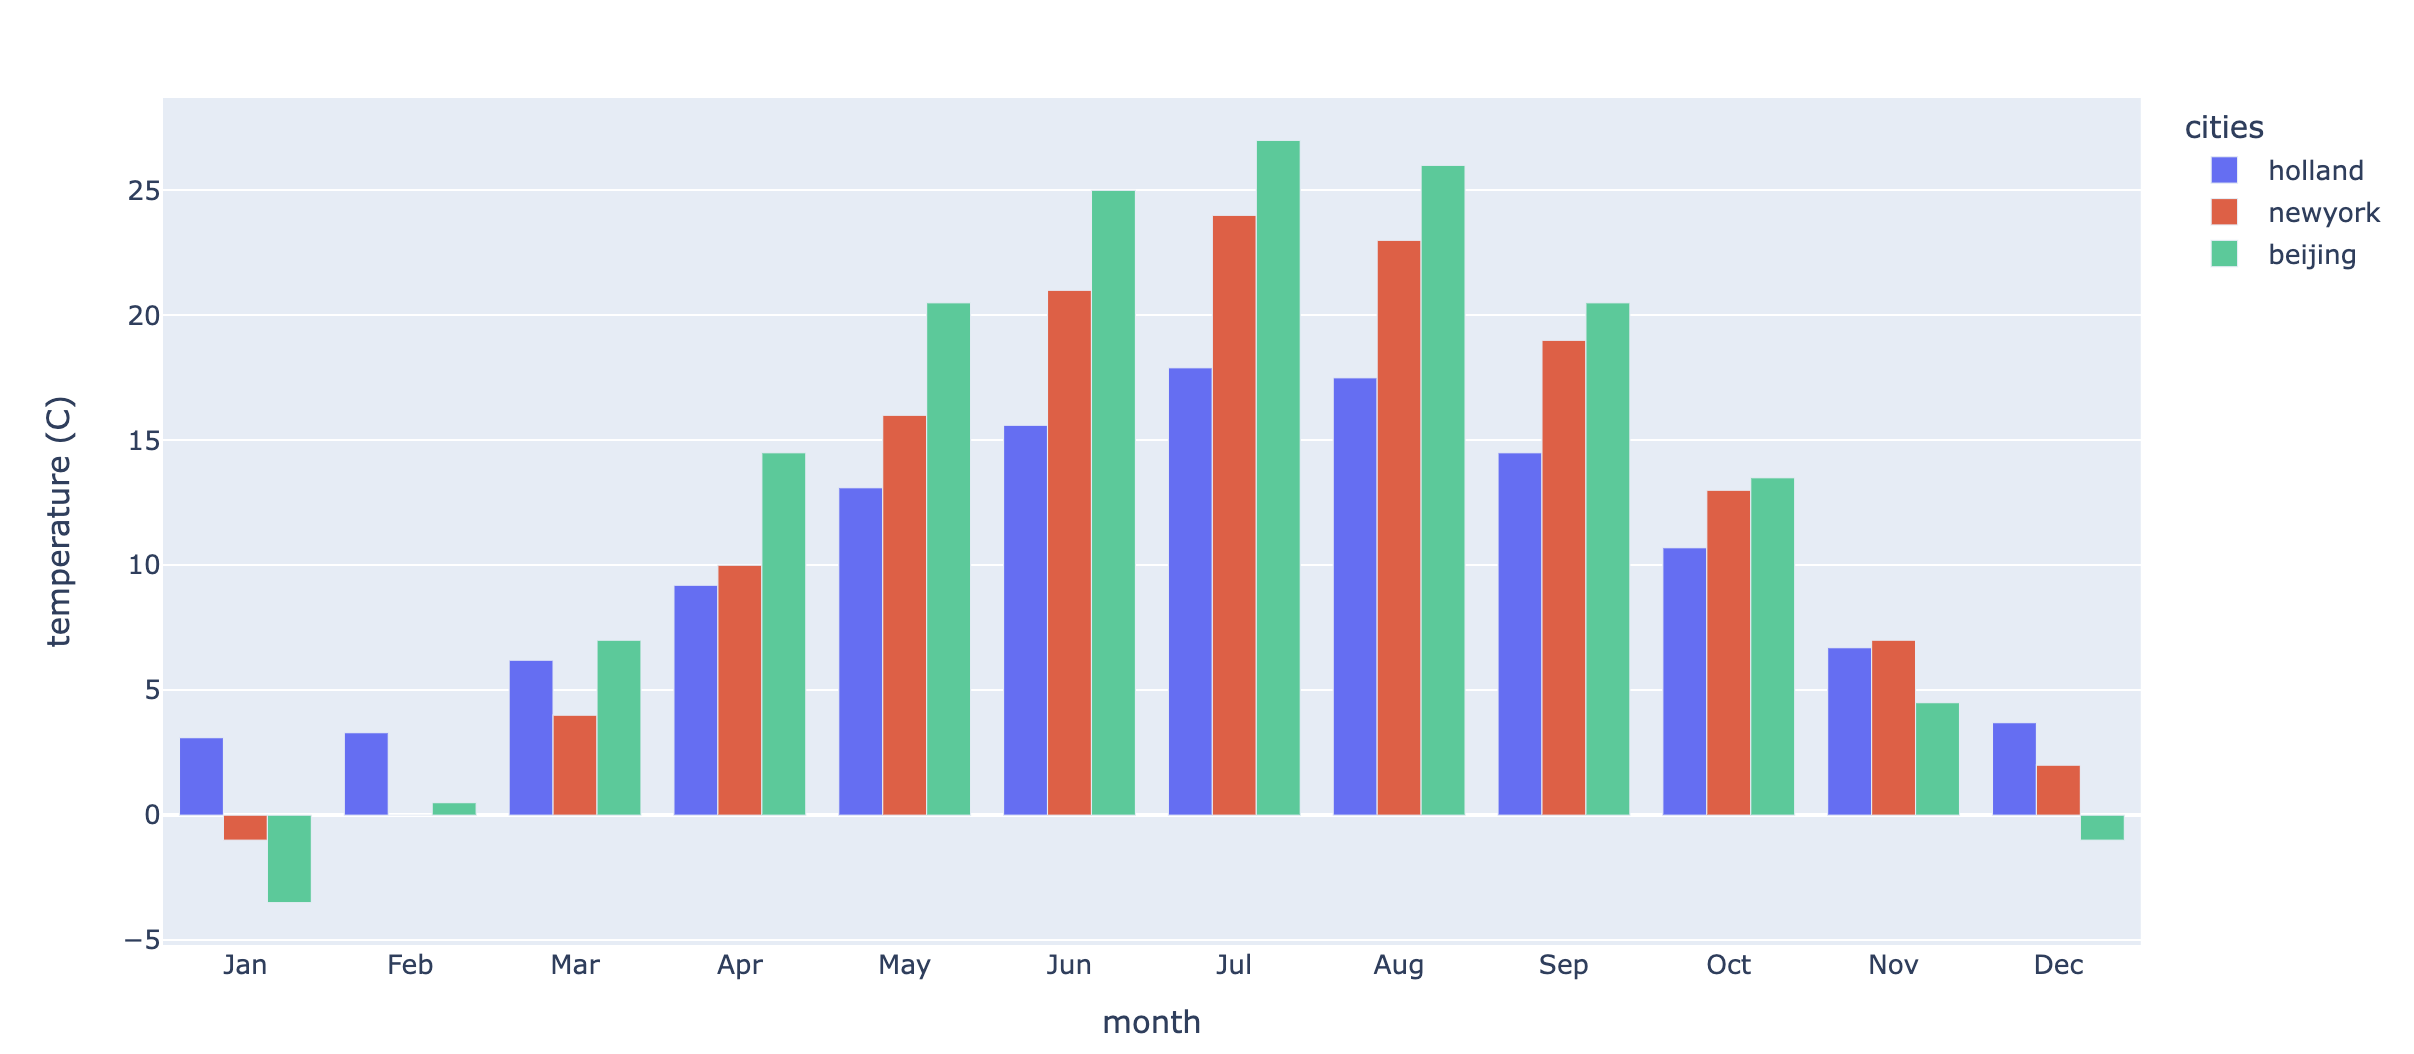

In [47]:
# Create a DataFrame for easier handling with Plotly
import pandas as pd
df = pd.DataFrame(curves, index=months)
df = df.melt(var_name='Cities', value_name='Temperature', ignore_index=False).reset_index()
df.rename(columns={'index': 'Month'}, inplace=True)

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Month', y='Temperature', color='Cities', barmode='group',
             title="Monthly Temperatures ",
             labels={"Month": "Month of the Year", "Temperature": "Temperature (°C)"})

#show
fig.show()


display_images(['ass1_ex5.png'])

## Exercise 6

We use plotly's `make_subplots` function to produce a figure comprising a grid of subplots. Use this function to generate the following figure. Here, the file *holland_seawater.dat* contains seawater temperatures around Holland by month. The lower subplot plots the difference in air and sea temperatures by month. Why do you think air temperatures are higher in the spring and lower in the fall?

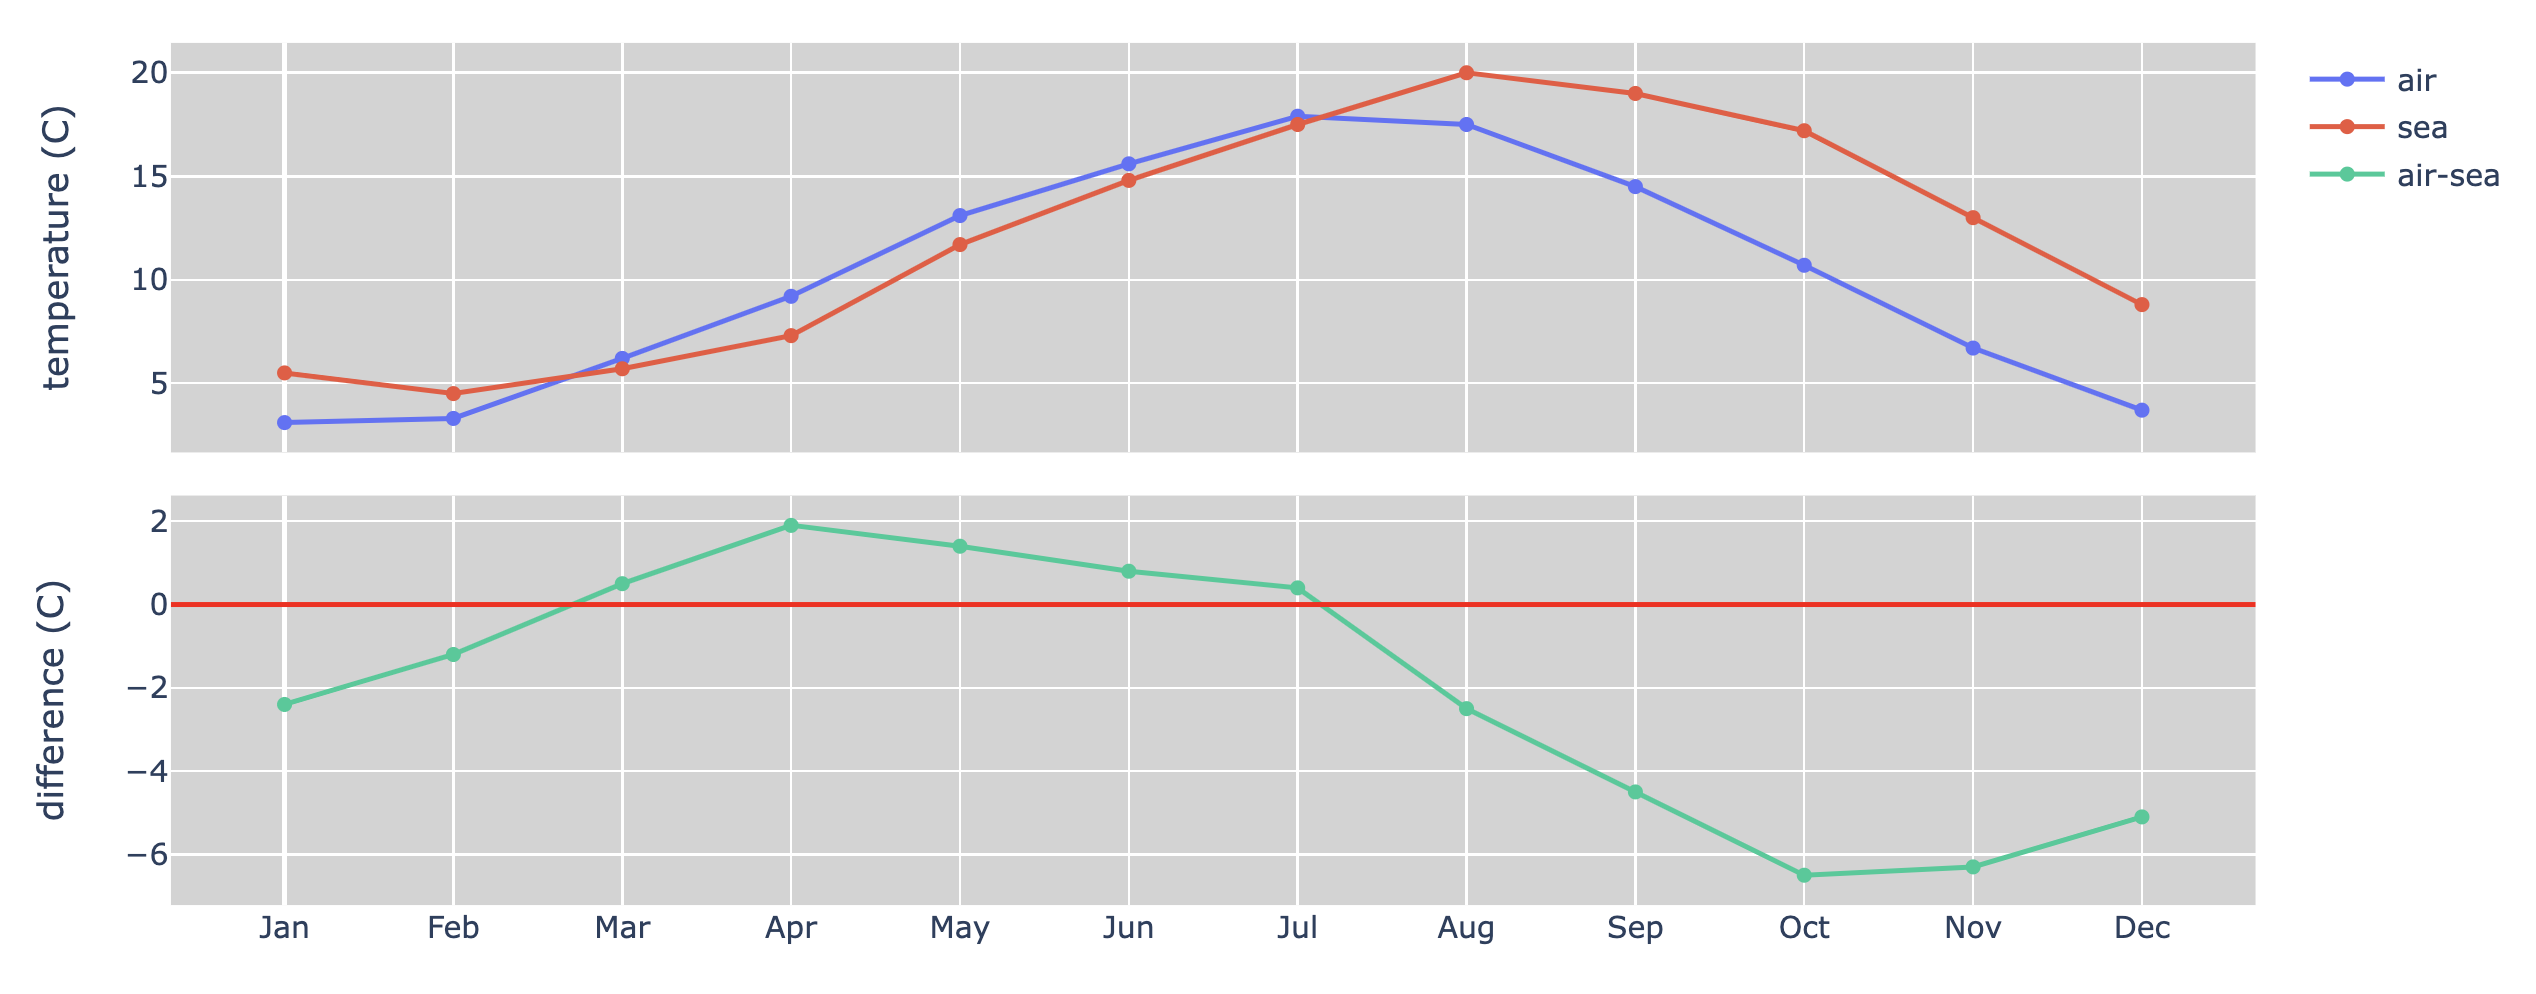

In [52]:
# load and calculated the difference
seawater_temps = np.loadtxt(datadir +'holland_seawater.dat')
temp_diff = holland - seawater_temps
# months = np.arange(1, 13)

# Create a subplot with 2 rows
fig = make_subplots(rows=2, cols=1, subplot_titles=('Air and Sea Temperatures', 'Difference between Air and Sea Temperatures'))

# First subplot for air and sea temperatures
fig.add_trace(go.Scatter(x=months, y=holland, mode='lines+markers', name='Air Temp'), row=1, col=1)
fig.add_trace(go.Scatter(x=months, y=seawater_temps, mode='lines+markers', name='Sea Temp'), row=1, col=1)

# Second subplot for the difference in temperatures
fig.add_trace(go.Scatter(x=months, y=temp_diff, mode='lines+markers', name='Temp Difference'), row=2, col=1)
fig.add_hline(y=0, line_color="red", row=2, col=1)


# Update layout if necessary
fig.update_layout(height=600, width=800, title_text="Temperature Analysis for Holland",
                  yaxis_title='Temperature (°C)',
                  yaxis2_title='Temperature (°C)')
fig.show()


display_images(['ass1_ex6.png'])


